# Conclusions

<b>Does more expensive wine taste better?</b><br>
The data shows that generally the more a wine costs, the higher rating it received. However, there is a point of diminishing returns where a wine may cost significantly more, but not be rated that much higher. Obviously it is up to each individual person what they consider expensive and what they want to spend, but the data shows you don’t have to spend hundreds or thousands of dollars for highly rated wine.

<b>What country makes the best wine?</b><br>
We were surprised at which countries had the highest average ratings. Now when we buy wine, we will consider wine from countries we wouldn’t have before. 

<b>What variety of wine do people like best?</b><br>
There are way more varieties of wine that we thought. So we narrowed it down to the 6 most common. This information can be used when selected your wine.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read CSV

wine_data = "winemag-data-good.csv"
wine_data = pd.read_csv(wine_data, encoding="UTF-8")
wine_data.loc[:, 'points'] = pd.to_numeric(wine_data['points'], errors = 'coerce')
wine_data.loc[:, 'price'] = pd.to_numeric(wine_data['price'], errors = 'coerce')

In [3]:
wine_data.head(5)
wine_data.drop(wine_data.columns[wine_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
wine_data.head(5)

,country,description,points,price,province,region_1,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,NaN,Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Lake Michigan Shore,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Navarra,Tempranillo-Merlot,Tandem


# Price vs Rating Stacked Bar Chart

In [5]:
price_bins = [0, 10, 25, 50, 75, 100, 10000]
group_names = ["0-10", "11-25", "26-50", "51-75", "76-100", "101+"]
point_bins = [80, 85, 90, 95, 100]
point_groups = ["80-85", "86-90", "91-95", "96-100"]

wine_data_copy = wine_data
wine_data_copy["Wine Price"] = pd.cut(wine_data_copy["price"], price_bins, labels=group_names)
wine_data_copy["Wine Rating"] = pd.cut(wine_data_copy["points"], point_bins, labels=point_groups)

In [6]:
points_by_price_gp = wine_data_copy.groupby("Wine Price")
num_points = points_by_price_gp['Wine Rating'].value_counts()
x = num_points.unstack()

<function matplotlib.pyplot.show(*args, **kw)>

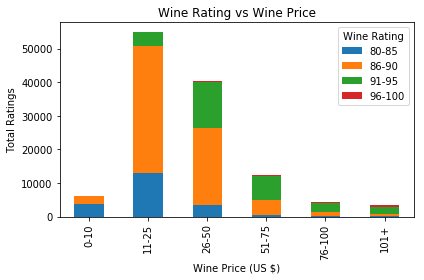

In [7]:
x.plot(kind='bar', stacked=True)
plt.title("Wine Rating vs Wine Price")
plt.xlabel("Wine Price (US $)")
plt.ylabel("Total Ratings")
plt.tight_layout()
plt.savefig("Rating_vs_Price_Stacked_Bar.png")
plt.show

# Price vs Rating Scatterplot

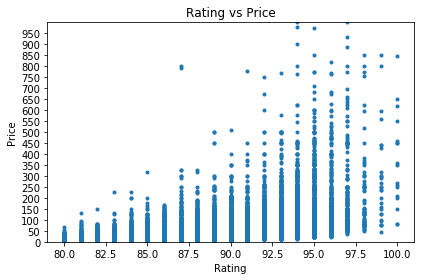

In [8]:
wine_data["price"]
wine_data["points"]
x = wine_data["points"]
y = wine_data["price"]
plt.scatter(marker = ".", x = x, y = y)
plt.ylim(0, 1000)
plt.yticks(np.arange(0, 1000, 50))
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating vs Price")
plt.tight_layout()
plt.savefig("Rating_vs_Price_Scatter.png")
plt.show()

# Price vs Rating by Variety

In [9]:
wine_chardonnay = wine_data[wine_data['variety'].str.contains(r'(?:\s|^)Chardonnay(?:\s|$)')]
wine_riesling = wine_data[wine_data['variety'].str.contains(r'(?:\s|^)Riesling(?:\s|$)')]
wine_pinot_gris = wine_data[wine_data['variety'].str.contains(r'(?:\s|^)Pinot Gris(?:\s|$)')]
wine_data_sauvignon_blanc = wine_data[wine_data['variety'].str.contains(r'(?:\s|^)Sauvignon Blanc(?:\s|$)')]
wine_data_pinot_noir = wine_data[wine_data['variety'].str.contains(r'(?:\s|^)Pinot Noir(?:\s|$)')]
wine_data_zinfandel = wine_data[wine_data['variety'].str.contains(r'(?:\s|^)Zinfandel(?:\s|$)')]

top_wine_variety = wine_chardonnay.append(wine_riesling)
top_wine_variety = top_wine_variety.append(wine_pinot_gris)
top_wine_variety = top_wine_variety.append(wine_data_sauvignon_blanc)
top_wine_variety  = top_wine_variety.append(wine_data_pinot_noir)
top_wine_variety = top_wine_variety.append(wine_data_zinfandel)
top_wine_variety

,country,description,points,price,province,region_1,variety,winery,Wine Price,Wine Rating
12,US,Building on 150 years and six generations of w...,87,12,California,Central Coast,Chardonnay,Mirassou,11-25,86-90
48,US,This shows jelly-like flavors of orange and pe...,85,30,California,Napa Valley,Chardonnay,RustRidge,26-50,80-85
49,US,"This is weighty, creamy and medium to full in ...",85,14,California,North Coast,Chardonnay,Souverain,11-25,80-85
58,France,"From the warm 2015 vintage, this is a soft and...",86,24,Burgundy,Chablis,Chardonnay,Simonnet-Febvre,11-25,86-90
59,France,"This soft, rounded wine is ripe with generous ...",86,15,Burgundy,Mâcon-Milly Lamartine,Chardonnay,Vignerons des Terres Secrètes,11-25,86-90
63,US,"Aromas of vanilla, char and toast lead to ligh...",86,12,Washington,Columbia Valley (WA),Chardonnay,Drumheller,11-25,86-90
70,Australia,This medium-bodied Chardonnay features aromas ...,86,18,South Australia,South Australia,Chardonnay,Yalumba,11-25,86-90
95,Chile,A bright nose with green apple and citric arom...,87,18,Leyda Valley,NaN,Chardonnay,Leyda,11-25,86-90
107,US,"Poached pears, yellow apples and a touch of bu...",87,18,California,Paso Robles,Chardonnay,Pull,11-25,86-90
113,US,The vineyard is one of the better Chardonnay s...,92,36,California,Alexander Valley,Chardonnay,Matrix,26-50,91-95


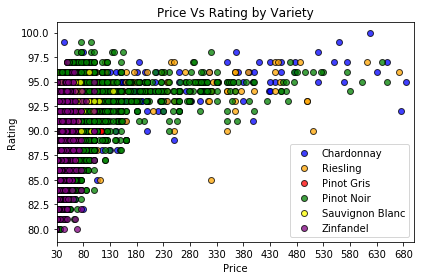

In [10]:
average_price_by_variety = top_wine_variety.groupby("variety").price.mean()
average_points_by_variety = top_wine_variety.groupby("variety").points.mean()
labels = ["Chardonnay", "Riesling", "Pinot Gris", "Pinot Noir", "Sauvignon Blanc","Zinfandel"]

chardonnay = top_wine_variety.loc[top_wine_variety["variety"] == "Chardonnay"]
riesling = top_wine_variety.loc[top_wine_variety["variety"] == "Riesling"]
pinot_gris = top_wine_variety.loc[top_wine_variety["variety"] == "Pinot Gris"]
pinot_noir = top_wine_variety.loc[top_wine_variety["variety"] == "Pinot Noir"]
sauvignon_blanc = top_wine_variety.loc[top_wine_variety["variety"] == "Sauvignon Blanc"]
zinfandel = top_wine_variety.loc[top_wine_variety["variety"] == "Zinfandel"]


plt.scatter(marker = 'o', x=chardonnay["price"], y=chardonnay["points"], alpha = 0.75, color = "blue", edgecolor = "black")
plt.scatter(marker = 'o', x=riesling["price"], y=riesling["points"], alpha = 0.75, color = "orange", edgecolor = "black")
plt.scatter(marker = 'o', x=pinot_gris["price"], y=pinot_gris["points"], alpha = 0.75, color = "red", edgecolor = "black")
plt.scatter(marker = 'o', x=pinot_noir["price"], y=pinot_noir["points"], alpha = 0.75, color = "green", edgecolor = "black")
plt.scatter(marker = 'o', x=sauvignon_blanc["price"], y=sauvignon_blanc["points"], alpha = 0.75, color = "yellow", edgecolor = "black")
plt.scatter(marker = 'o', x=zinfandel["price"], y=zinfandel["points"], alpha = 0.75, color = "purple", edgecolor = "black")

lgnd = plt.legend(labels)
plt.title("Price Vs Rating by Variety")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.xlim(30, 700)

plt.xticks(np.arange(30, 700, 50))
plt.savefig("Price_Vs_Rating_By_Top_Variety.png")

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rcParams['axes.labelweight'] = 'bold'
plt.tight_layout()
plt.show()


In [11]:
# Labels for the sections of our pie chart
#labels = ["Chardonnay", "Riesling", "Pinot Gris", "Pinot Noir", "Sauvignon Blanc","Zinfandel"
top_avg_price = top_wine_variety.groupby("variety").price.mean()

# The values of each section of the pie chart
sizes = [top_avg_price[0], top_avg_price[1], top_avg_price[2], top_avg_price[3], top_avg_price[4], top_avg_price[5]]

# The colors of each section of the pie chart
colors = ["darkgray", "tomato", "sandybrown", "royalblue", "palevioletred", "mediumseagreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0.1, 0)

Text(0.5, 1.0, 'Average Price for Top Variety')

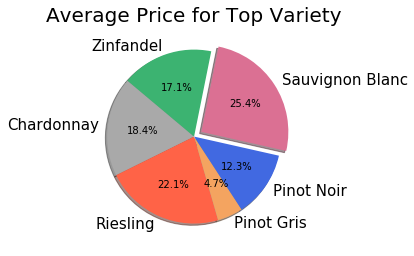

In [12]:
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Average Price for Top Variety")

# Rating By Country

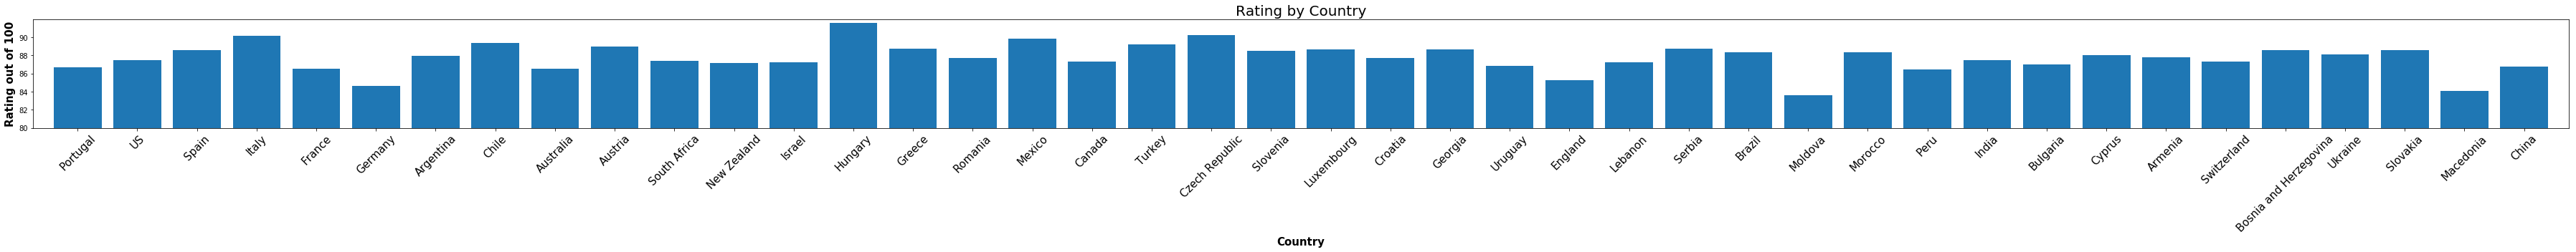

In [13]:
average_points = wine_data.groupby('country')['points'].mean()
countries = wine_data.groupby('country')
countries_unique = wine_data['country'].unique()

x_axis = np.arange(len(countries))
plt.title("Rating by Country")
plt.xlabel("Country")
plt.ylabel("Rating out of 100")
plt.bar(x_axis, average_points, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries_unique, rotation = 45)
fig = plt.gcf()
fig.set_size_inches(50, 5)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(80, max(average_points)+0.4)
plt.tight_layout()
plt.savefig("Rating_By_Country")
plt.show()

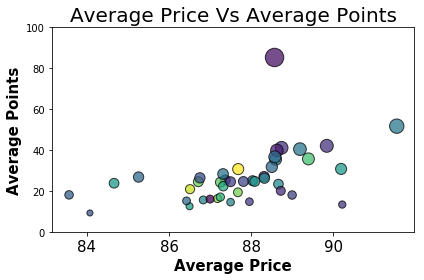

In [14]:
average_points_country = wine_data.groupby("country")["points"].mean()
average_price_country = wine_data.groupby("country")["price"].mean()
countries = wine_data["country"].unique()
c = np.random.normal(size=42)
plt.scatter(marker = 'o', x=average_points_country, y=average_price_country, alpha = 0.75, c = c, edgecolor = "black", s = average_price_country*4)
plt.title("Average Price Vs Average Points")
plt.xlabel("Average Price")
plt.ylabel("Average Points")
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("Avg_Price_vs_Avg_Points")
plt.show()